# Nonlinear Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from dynamics import linear_dynamics
from scipy.integrate import odeint

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Hartman-Grobman Linearisation Theorem

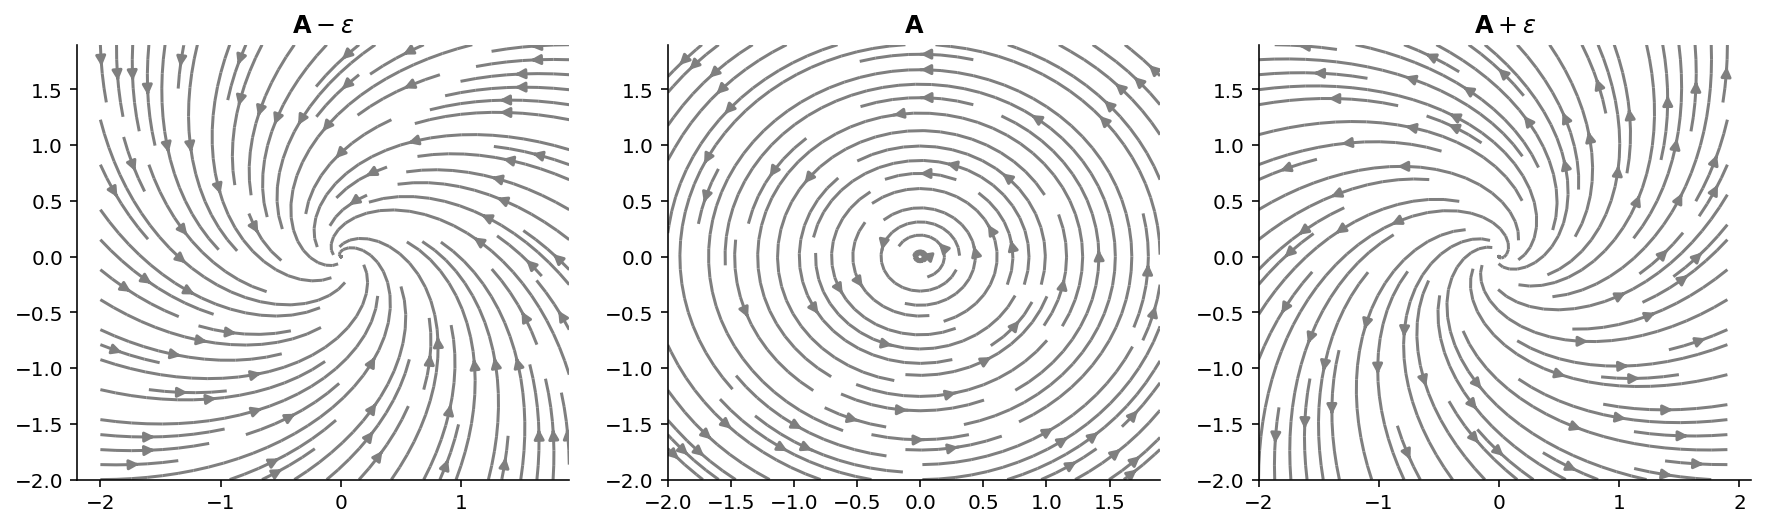

In [3]:
a, b = 0, 1e-2
A = np.array([[a, -b], [b, a]])

eps = 0.01
shocks = eps * np.array([-1, 0, 1])
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for shock, axi in zip(shocks, ax):
    X, X_dot = linear_dynamics(A + shock * np.eye(2))
    sign = np.sign(shock)
    if sign == -1:
        sign = "-\epsilon\bf I$"
    elif sign == 1:
        sign = "+\epsilon\bf I$"
    else:
        sign = "$"
    axi.set_title(r"${\bf A}" f"{sign}")
    axi.streamplot(*X, *X_dot, color="tab:gray")

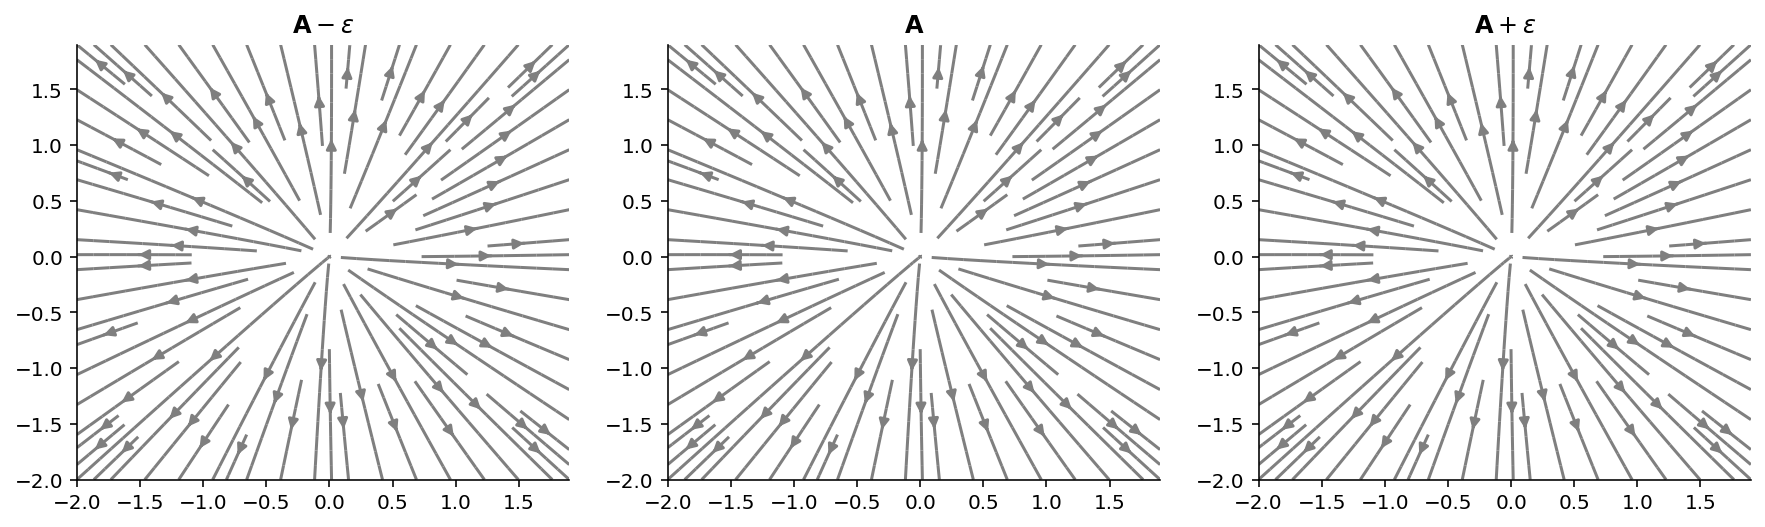

In [4]:
a, b = 1, 1e-2
A = np.array([[a, -b], [b, a]])

eps = 0.01
shocks = eps * np.array([-1, 0, 1])
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for shock, axi in zip(shocks, ax):
    X, X_dot = linear_dynamics(A + shock * np.eye(2))
    sign = np.sign(shock)
    if sign == -1:
        sign = "-\epsilon\bf I$"
    elif sign == 1:
        sign = "+\epsilon\bf I$"
    else:
        sign = "$"
    axi.set_title(r"${\bf A}" f"{sign}")
    axi.streamplot(*X, *X_dot, color="tab:gray")

### Where HGLT fails

In [5]:
def f(x):
    x, y = x
    return (y - x ** 3, -x - y ** 3)


A = np.array([[0, 1], [-1, 0]])

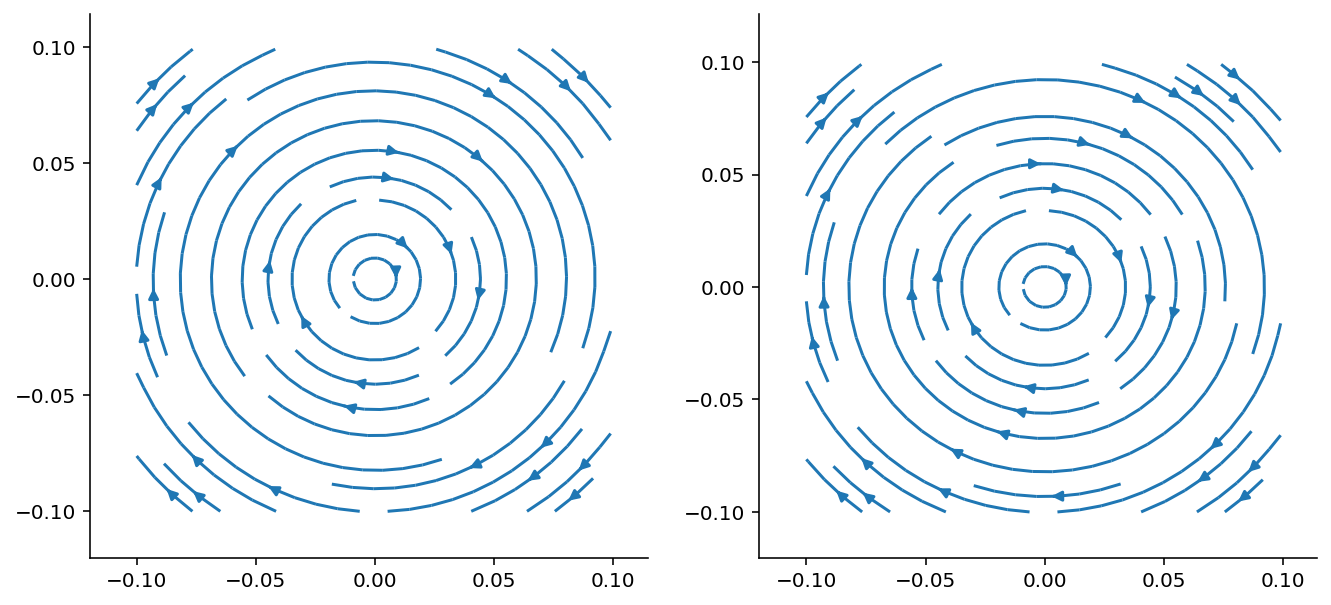

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

vmin, vmax, step = -0.1, 0.1, 1e-3

X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
X_dot = np.apply_along_axis(f, 0, X)
ax[0].streamplot(*X, *X_dot, maxlength=100, density=0.6)

X, X_dot = linear_dynamics(A, vmin=vmin, vmax=vmax, step=step)
ax[1].streamplot(*X, *X_dot, maxlength=100, density=0.6)

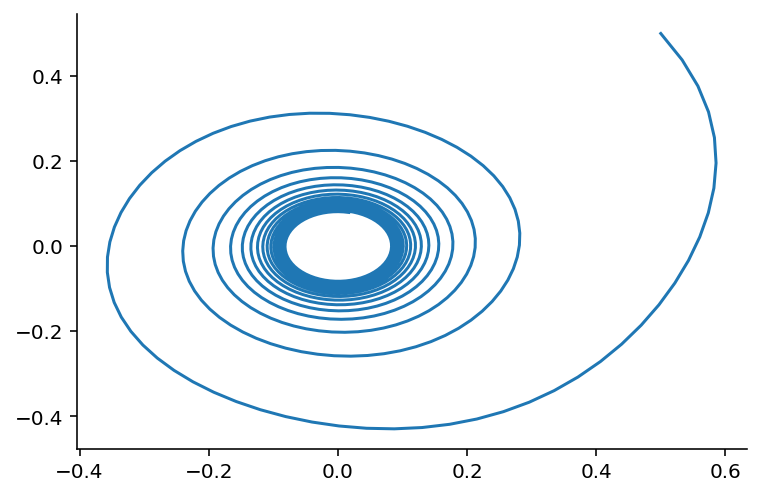

In [7]:
# The system does tend to zero, but it does so very slowly
def f(x, t):
    x, y = x
    return (y - x ** 3, -x - y ** 3)

x_init = np.array([0.5, 0.5])
xy_system = odeint(f, x_init, np.linspace(0, 100, 1000))
plt.plot(*xy_system.T)

In [8]:
def f(x):
    x, y = x
    return -x ** 2, -y


A = np.array([[0, 0], [0, -1]])

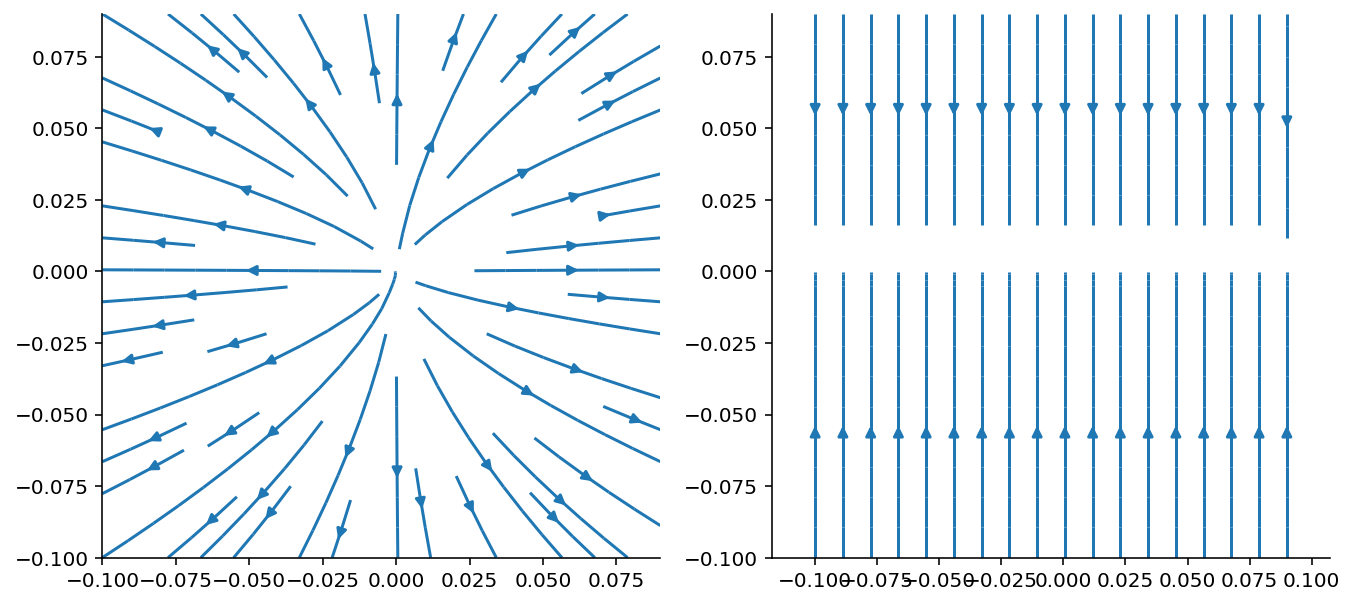

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

vmin, vmax, step = -0.1, 0.1, 1e-2

X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
X_dot = np.apply_along_axis(f, 0, X)
ax[0].streamplot(*X, *X_dot, maxlength=100, density=0.6)

X, X_dot = linear_dynamics(A, vmin=vmin, vmax=vmax, step=step)
ax[1].streamplot(*X, *X_dot, maxlength=100, density=0.6)

## More Nonlinear Systems

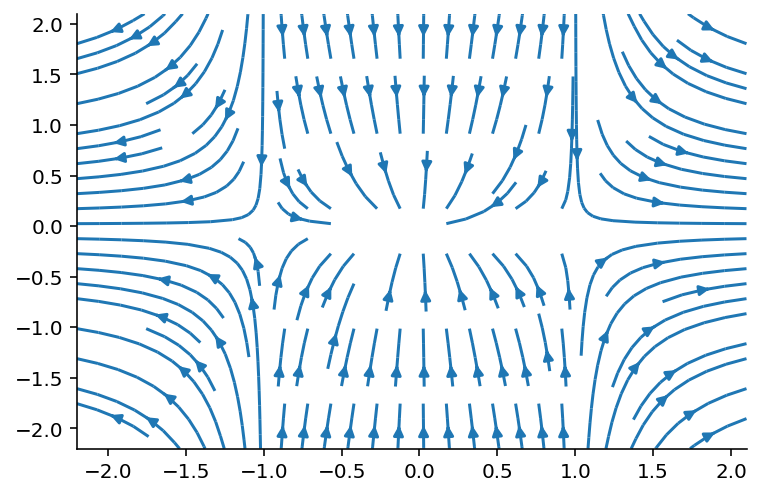

In [10]:
def f(x):
    x, y = x
    return -x + x ** 3, -2 * y

vmin, vmax, step = -2.2, 2.2, 0.1
X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
X_dot = np.apply_along_axis(f, 0, X)
plt.streamplot(*X, *X_dot, integration_direction="backward")

### The figure-8 system

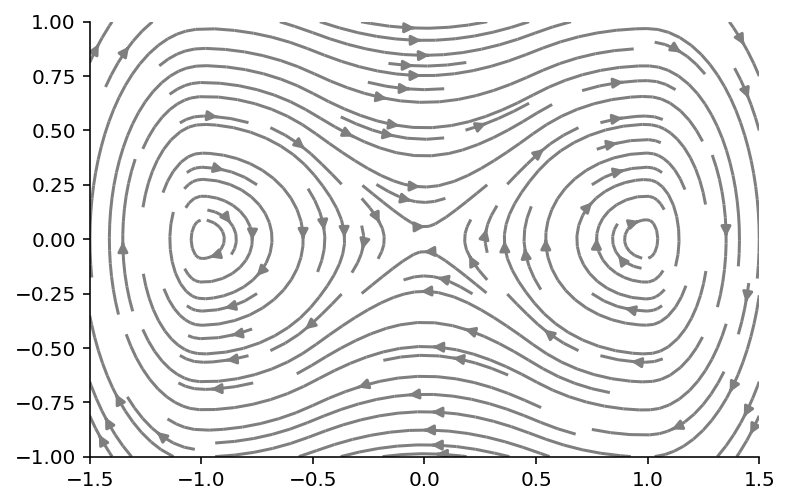

In [11]:
def f(x):
    x, y = x
    return  y, x - x ** 3
    
vmin, vmax, step = -1.5, 1.5 + 0.5, 0.5
X = np.mgrid[-1:1.5:step, vmin:vmax:step][::-1]
X_dot = np.apply_along_axis(f, 0, X)
plt.streamplot(*X, *X_dot, density=1.1, color="tab:gray")

In [12]:
eigenvectors = np.array([
    [[1, 0],
    [0, 1]],
    
    [[3, 1],
     [-1, 0]],
    
    [[1, 0],
     [-2, 1]],
    
    [[np.sqrt(2), np.sqrt(2)],
     [-1, 1]]
])

(-1.0, 3.0)

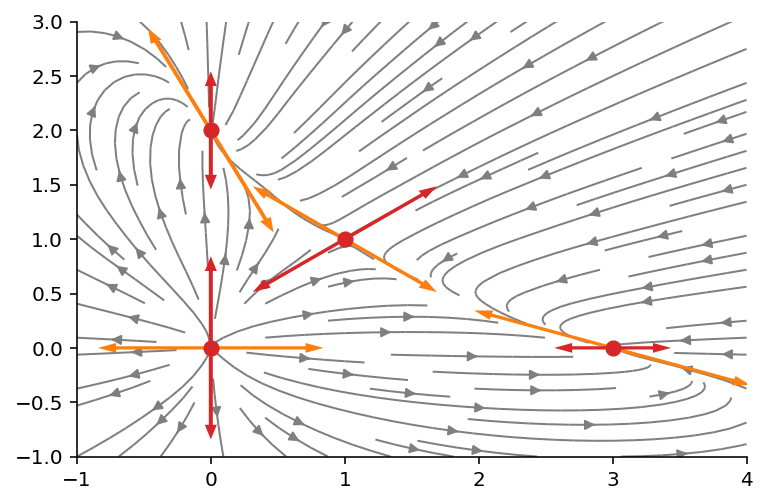

In [13]:
def f(x):
    x, y = x
    return  3 * x - x ** 2 - 2 * x * y, 2 * y - x * y - y ** 2
    
vmin, vmax, step = -1, 4 + 0.5, 0.5
X = np.mgrid[-1:vmax:step, vmin:vmax:step][::-1]
X_dot = np.apply_along_axis(f, 0, X)
plt.streamplot(*X, *X_dot, density=1.1, color="tab:gray", zorder=1, linewidth=1)

fixed_points = np.array([(0, 0), (3, 0), (0, 2), (1, 1)])
plt.scatter(*fixed_points.T, c="tab:red", s=50, zorder=2)

for fp, eigvec in zip(fixed_points, eigenvectors):
    L2 = np.linalg.norm(eigvec) ** 1
    plt.arrow(*fp, *eigvec[:, 0] / L2, width=0.03, linewidth=0, color="tab:orange")
    plt.arrow(*fp, *eigvec[:, 1] / L2, width=0.03, linewidth=0, color="tab:red")
    
    plt.arrow(*fp, *-eigvec[:, 0] / L2, width=0.03, linewidth=0, color="tab:orange")
    plt.arrow(*fp, *-eigvec[:, 1] / L2, width=0.03, linewidth=0, color="tab:red")
plt.xlim(-1, 4)
plt.ylim(-1, 3)